<a href="https://colab.research.google.com/github/mind-render/MIDI_Classification/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from operator import truediv
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    # transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize((0.5,0.5,0.5), (0.2,0.2,0.2))])


#(data scaling), Normalization 0-1사이로 변환= transforms.ToTensor()
#transforms.ToTensor() pixel [0,255]->[0.0,1.0] (이미지를 Pytorch tensors 타입으로 변형)
#Tensor = 간단하게는 다차원의 배열, (Multilinear Map)
#Data르 ㄹ위한 Container, 2D=행렬...
#transforms.Normalize (mean1,2,3) (std 1,2,3) 채널별로 0.5를 주면, Tensor의 각 값이 (X-mean)/std로 변경, 예시 출력해봄
#차원을 맞춰줘야 값이 나옴


dkktest1=torch.tensor([[[0.5,1,0.7],[0.8,0.2,0.1],[0.5,1,0.7]],[[0.5,1,0.7],[0.8,0.2,0.1],[0.5,1,0.7]],[[0.5,1,0.7],[0.8,0.2,0.1],[0.5,1,0.7]]])
#Normalize Test
print(dkktest1)
transforms.Normalize((0.5, 0.5, 0.5), (0.2, 0.2, 0.2))(dkktest1)

batch_size = 20

trainset = torchvision.datasets.CIFAR10(root='data', train=True,
                                        download=True, transform=transform)
# Datasets 파라미터들 : root=학습 데이터가 저장되는 경로, train=T/F(True=학습용, False=테스트용) ,
# Download=root에 데이터 없으면 인터넷에서 다운, Transform = 변형 지정

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=truediv,num_workers=2)
#DataLoader 파라미터들: 생성한 dataset, Batch_size=1 step에 넣어줄 데이터의 갯수를 정한다
#Shuffle = 데이터의 순서 섞고, num_workers = 멀티프로세스 데이터 로딩

testset = torchvision.datasets.CIFAR10(root='data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False,num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

tensor([[[0.5000, 1.0000, 0.7000],
         [0.8000, 0.2000, 0.1000],
         [0.5000, 1.0000, 0.7000]],

        [[0.5000, 1.0000, 0.7000],
         [0.8000, 0.2000, 0.1000],
         [0.5000, 1.0000, 0.7000]],

        [[0.5000, 1.0000, 0.7000],
         [0.8000, 0.2000, 0.1000],
         [0.5000, 1.0000, 0.7000]]])


100%|██████████| 170498071/170498071 [00:02<00:00, 76593657.34it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


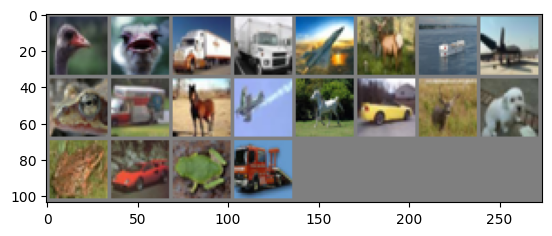

bird
bird
truck
truck
plane
deer
ship
plane
frog
truck
horse
plane
horse
car
deer
dog
frog
car
frog
truck


In [ ]:
import matplotlib.pyplot as plt

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 5 + 0.5     # imshow하려면 rgb data를 [0.,1.]or [0,255]for integer 지금 값이 -1 to 1이니 /2+0.5
    #normalize std값을 바꿔서 역으로 바꿔주는 숫자 바꿈
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
for j in range(batch_size):
  print(classes[labels[j]])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
# class Model(nn.Module)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.pool = nn.MaxPool2d(2, 2)
        #2*2로 MAX Pooling
        #dropout rate 0,2->0.3
        self.dropout_1= nn.Dropout(0.3)
        self.dropout_2= nn.Dropout(0.3)
        self.dropout_3= nn.Dropout(0.3)
        self.dropout_4= nn.Dropout(0.3)
        self.dropout_5= nn.Dropout(0.3)
        self.batch_norm2d_64 = nn.BatchNorm2d(num_features=64)

        self.batch_norm2d_128 = nn.BatchNorm2d(num_features=128)

        self.batch_norm2d_256 = nn.BatchNorm2d(num_features=256)
        self.batch_norm2d_512 = nn.BatchNorm2d(num_features=512)

        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)

        self.conv2_1 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv2_2 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv2_3 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv2_4 = nn.Conv2d(64, 64, 3, padding=1)
        #v2 32 32

        self.conv2tov3_1 = nn.Conv2d(64, 128, 1)
        #Max Pooling 대신 Stride2로 image size를 줄여보자
        self.conv2tov3_2 = nn.Conv2d(128, 128, 3, padding=1, stride=2)


        self.conv3_1 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv3_3 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv3_4 = nn.Conv2d(128, 128, 3, padding=1)
        #v3 16 16
        self.conv3tov4_1 = nn.Conv2d(128, 256, 1)
        self.conv3tov4_2 = nn.Conv2d(256, 256, 3, padding=1, stride=2)

        self.conv4_1 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv4_3 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv4_4 = nn.Conv2d(256, 256, 3, padding=1)
        #v4 8 8
        self.conv4tov5_1 = nn.Conv2d(256, 512, 1)
        self.conv4tov5_2 = nn.Conv2d(512, 512, 3, padding=1, stride=2)

        self.conv5_1 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv5_4 = nn.Conv2d(512, 512, 3, padding=1)
        #v5 4 4

        #Fully Connected Layer
        self.fc1 = nn.Linear(512*4*4, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):

        x=F.relu(self.conv1(x))
        x=self.dropout_1(x)

        y=x
        x=F.relu(self.conv2_1(x))
        x=F.relu(self.conv2_2(x))+y

        x=self.dropout_2(x)

        x=self.batch_norm2d_64(x)

        y=x
        x=F.relu(self.conv2_3(x))
        x=F.relu(self.conv2_4(x))+y


        #v3 16 16
        x=F.relu(self.conv2tov3_1(x))
        x=F.relu(self.conv2tov3_2(x))
        #x=self.pool(x)

        y=x
        x=F.relu(self.conv3_1(x))
        x=F.relu(self.conv3_2(x))+y

        x=self.dropout_3(x)
        x=self.batch_norm2d_128(x)

        y=x
        x=F.relu(self.conv3_3(x))
        x=F.relu(self.conv3_4(x))+y

        #v4 8 8
        x=F.relu(self.conv3tov4_1(x))
        #x=F.relu(self.conv3tov4_2(x))
        x=self.pool(x)

        y=x
        x=F.relu(self.conv4_1(x))
        x=F.relu(self.conv4_2(x))+y
        x=self.batch_norm2d_256(x)

        x=self.dropout_4(x)

        y=x
        x=F.relu(self.conv4_3(x))
        x=F.relu(self.conv4_4(x))+y

        #v4 8 8
        x=F.relu(self.conv4tov5_1(x))
        #x=F.relu(self.conv4tov5_2(x))
        x=self.pool(x)

        y=x
        x=F.relu(self.conv5_1(x))
        x=F.relu(self.conv5_2(x))+y
        x=self.batch_norm2d_512(x)
        x=self.dropout_5(x)

        y=x
        x=F.relu(self.conv5_3(x))
        x=F.relu(self.conv5_4(x))+y
        #v5 4 4



        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        #print(x.shape)
        #x = x.reshape(x.shape[0], -1) 평탄화하는 다른 방법
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()

# ##########GPU#####
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# # # CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

# print(device)
# net.to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.001, eps=1e-08, weight_decay=0)

# optimizer = optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.0001)
#lr 얼마나 움직일지,

#논문 그대로 가보자!
#optimizer = optim.SGD(net.parameters(), lr=0.001, weight_decay=0.0001, momentum=0.9)

#weight decay를 크게? 실패
#optimizer = optim.Adam(net.parameters(), lr=0.0003, weight_decay=0.05)

optimizer = optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.0001)
#Optimizer = Loss Function 결과값을 최소화하려는 알고리즘

#Batch=전체 한번보고
#SGD = 하나 볼때마다 업데이트
#minibatch 미니배치씩 보는,.. SGD랑 Batch의 사이?

#lr 스케쥴러 만들어보자
#lambda lr은 수렴하듯이 줄어듬
#one cycle lr함수는 한번 위로 튀었다 수렴하듯이 줄어듬 둘다 써봅시다
#그래서 lambda쓸때는 좀 초기 lr을 늘려서 해봐야겠다

#scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,lr_lambda=lambda epoch: 0.95 ** epoch,last_epoch=-1,verbose=False)

#scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer,max_lr=0.001, epochs = 10, steps_per_epoch=len(trainloader))

# scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer,step_size=1,gamma=0.3)

scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer=optimizer,
    max_lr=0.001,
    epochs = 10,
    steps_per_epoch=len(trainloader))

In [ ]:
# ##########GPU#####
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# # # CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device,"wtf")

net.to(device)

cuda:0 wtf


Net(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout_1): Dropout(p=0.3, inplace=False)
  (dropout_2): Dropout(p=0.3, inplace=False)
  (dropout_3): Dropout(p=0.3, inplace=False)
  (dropout_4): Dropout(p=0.3, inplace=False)
  (dropout_5): Dropout(p=0.3, inplace=False)
  (batch_norm2d_64): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2d_128): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2d_256): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2d_512): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_3): Conv2d(64, 64, kernel_size=(

In [ ]:
for epoch in range(10):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    print("lr: ", optimizer.param_groups[0]['lr'])
    #scheduler.step()
    print("step lr: ", optimizer.param_groups[0]['lr'])
    for i, data in enumerate(trainloader):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        # 변화도(Gradient) 매개변수를 0으로
        optimizer.zero_grad()
        # 순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        nn.utils.clip_grad_value_(net.parameters(), clip_value=0.1)
        scheduler.step()
        # 통계 출력
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            print("updated lr: ", optimizer.param_groups[0]['lr'])
            running_loss = 0.0
            correct = 0
            total = 0
            for data in testloader:
                #images, labels = data
                images, labels = data[0].to(device), data[1].to(device)
                # 신경망에 이미지를 통과시켜 출력을 계산합니다
                outputs = net(images)
                # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                if(total>100):
                    break
            print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')



    correct = 0
    total = 0
    # 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
    with torch.no_grad():
        for data in testloader:
            #images, labels = data
            images, labels = data[0].to(device), data[1].to(device)
            # 신경망에 이미지를 통과시켜 출력을 계산합
            outputs = net(images)
            # 가장 높은 값(energy)를 갖는 분류(class)를 정답
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

lr:  3.9999999999999996e-05
step lr:  3.9999999999999996e-05
[1,  2000] loss: 0.066
updated lr:  0.00019885716110067272
Accuracy of the network on the 120 test images: 87 %
Accuracy of the network on the 10000 test images: 87 %
lr:  0.0002800580516594619
step lr:  0.0002800580516594619
[2,  2000] loss: 0.196
updated lr:  0.000668442900667775
Accuracy of the network on the 120 test images: 87 %
Accuracy of the network on the 10000 test images: 83 %
lr:  0.0007601160892772773
step lr:  0.0007601160892772773
[3,  2000] loss: 0.350
updated lr:  0.0009895498339141061
Accuracy of the network on the 120 test images: 79 %
Accuracy of the network on the 10000 test images: 82 %
lr:  0.0009999999919432124
step lr:  0.0009999999919432124
[4,  2000] loss: 0.398
updated lr:  0.0009680860161029515
Accuracy of the network on the 120 test images: 80 %
Accuracy of the network on the 10000 test images: 83 %
lr:  0.0009504456795971972
step lr:  0.0009504456795971972
[5,  2000] loss: 0.378
updated lr:  0.0

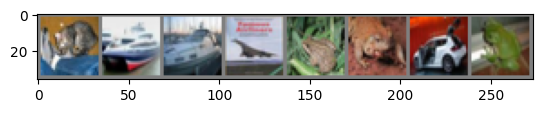

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   ship  car   ship 


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


In [ ]:

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


In [ ]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 57.3 %
Accuracy for class: car   is 79.4 %
Accuracy for class: bird  is 50.0 %
Accuracy for class: cat   is 27.8 %
Accuracy for class: deer  is 55.6 %
Accuracy for class: dog   is 28.1 %
Accuracy for class: frog  is 74.9 %
Accuracy for class: horse is 63.4 %
Accuracy for class: ship  is 77.5 %
Accuracy for class: truck is 55.9 %
